In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('leaf_data_uci_updated.csv')

In [114]:
df.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [116]:
df.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,1.902051,0.513760,0.919101,0.975867,0.531234,0.034647,0.284499,0.051209,0.124535,0.017491,0.005678,0.000356,1.162630
std,0.208311,0.888783,0.195583,0.075247,0.032506,0.217532,0.031502,0.365318,0.035518,0.051860,0.013189,0.004495,0.000336,0.584854
min,0.117080,1.006600,0.107610,0.761323,0.915575,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550622,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416433,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,4.040800,0.948340,0.993880,1.000000,0.858160,0.105303,1.016331,0.148349,0.280810,0.054967,0.017648,0.001137,2.708500


In [117]:
x = StandardScaler()
sdf = x.fit_transform(df)
sdf

array([[ 0.03406572, -0.48209894, -0.97186457, ..., -0.0993394 ,
        -0.24107626,  0.02220937],
       [ 0.10516996, -0.42406912, -0.78138363, ..., -0.66180812,
        -0.83677884, -0.79802302],
       [ 0.22771539, -0.37133521, -0.6338121 , ..., -1.06006173,
        -0.94670245, -1.23143573],
       ...,
       [-1.76156859, -0.97935258,  1.37079505, ...,  2.32734448,
         0.28950626,  0.90903502],
       [-0.57678648, -0.85563074,  1.03207692, ...,  0.11405691,
        -0.27155102, -0.01717466],
       [-1.19182128, -0.91490004,  1.74264253, ...,  1.73998658,
        -0.0808678 ,  0.68437481]])

In [118]:
sdf = pd.DataFrame(sdf, index=df.index, columns=df.columns)
sdf

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,-1.656859,-0.856758,1.554005,-2.099910,-1.857519,-1.869163,1.818855,2.006228,1.795295,1.623596,1.838507,1.708123,1.384125,1.481987
336,-2.111561,-0.920759,1.225989,-2.099910,-1.857519,-1.815621,1.409899,2.006228,2.537994,1.810722,2.125916,1.409096,2.327487,2.128913
337,-1.761569,-0.979353,1.370795,-2.099910,-1.857519,-1.824046,1.752190,2.006228,1.309833,1.593085,1.792795,2.327344,0.289506,0.909035
338,-0.576786,-0.855631,1.032077,-2.099910,-1.857519,-1.720736,2.246205,2.006228,-0.023134,0.218510,0.047836,0.114057,-0.271551,-0.017175


In [119]:
sdf.describe().round(0)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-2.0
25%,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
max,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0


In [120]:
zsdf = df.apply(zscore)
zsdf.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.034066,-0.482099,-0.971865,0.881718,0.743486,1.402718,-0.953401,-0.769100,-0.096417,0.065951,-0.105019,-0.099339,-0.241076,0.022209
1,0.105170,-0.424069,-0.781384,0.830744,0.689571,1.231226,-0.934782,-0.766208,-0.762703,-0.657718,-0.711617,-0.661808,-0.836779,-0.798023
2,0.227715,-0.371335,-0.633812,0.777907,0.743486,1.274732,-0.864365,-0.752173,-1.108478,-1.295588,-1.078407,-1.060062,-0.946702,-1.231436
3,0.087093,-0.498437,-0.819275,0.752752,0.743486,1.315476,-0.882820,-0.756324,-0.994197,-1.140210,-1.003871,-1.007984,-0.862100,-0.984224
4,0.495931,-0.148005,-0.354030,0.770320,0.743486,1.029856,-0.865297,-0.752390,-1.220111,-1.529370,-1.172391,-1.140460,-0.989599,-1.404965


In [121]:
zsdf.describe().round(0)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.0,-2.0
25%,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
max,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0


Perform Hierarchial Clustering

In [122]:
linkage_method = linkage(sdf, method='ward')

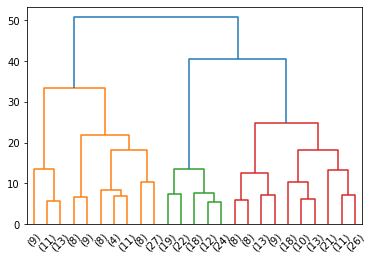

In [123]:
dend = dendrogram(linkage_method, truncate_mode='lastp', p=25)

In [124]:
clusters = fcluster(linkage_method, 2, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [125]:
df['H-Cluster'] = clusters

In [126]:
df

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H-Cluster
0,0.72694,1.4742,0.32396,0.985350,1.000000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2
1,0.74173,1.5257,0.36116,0.981520,0.998250,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2
2,0.76722,1.5725,0.38998,0.977550,1.000000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2
3,0.73797,1.4597,0.35376,0.975660,1.000000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2
4,0.82301,1.7707,0.44462,0.976980,1.000000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.761323,0.915575,0.125230,0.091860,1.016331,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,1
336,0.28064,1.0849,0.75319,0.761323,0.915575,0.136860,0.078996,1.016331,0.141220,0.218300,0.045488,0.012002,0.001137,2.40590,1
337,0.35344,1.0329,0.78147,0.761323,0.915575,0.135030,0.089763,1.016331,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,1
338,0.59988,1.1427,0.71532,0.761323,0.915575,0.157470,0.105303,1.016331,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,1


In [127]:
# Cluster frequency

aggdata = df.groupby('H-Cluster').mean()
aggdata

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
H-Cluster,,,,,,,,,,,,,,
1,0.717858,2.205208,0.698377,0.834265,0.937233,0.265168,0.067635,0.668989,0.038367,0.106530,0.012878,0.004330,0.000211,0.985519
2,0.720783,1.760925,0.427818,0.958594,0.993853,0.655092,0.019290,0.105512,0.057188,0.132917,0.019639,0.006306,0.000423,1.245078


In [128]:
aggdata['Freq'] = df['H-Cluster'].value_counts().sort_index()
aggdata

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,Freq
H-Cluster,,,,,,,,,,,,,,,
1,0.717858,2.205208,0.698377,0.834265,0.937233,0.265168,0.067635,0.668989,0.038367,0.106530,0.012878,0.004330,0.000211,0.985519,108
2,0.720783,1.760925,0.427818,0.958594,0.993853,0.655092,0.019290,0.105512,0.057188,0.132917,0.019639,0.006306,0.000423,1.245078,232


Agglomerative Clustering

In [129]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster_agglo = cluster.fit_predict(sdf)
cluster_agglo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [130]:
df['Agglo_Clusters'] = cluster_agglo

In [131]:
df

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H-Cluster,Agglo_Clusters
0,0.72694,1.4742,0.32396,0.985350,1.000000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2,1
1,0.74173,1.5257,0.36116,0.981520,0.998250,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2,1
2,0.76722,1.5725,0.38998,0.977550,1.000000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2,1
3,0.73797,1.4597,0.35376,0.975660,1.000000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2,1
4,0.82301,1.7707,0.44462,0.976980,1.000000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.761323,0.915575,0.125230,0.091860,1.016331,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,1,0
336,0.28064,1.0849,0.75319,0.761323,0.915575,0.136860,0.078996,1.016331,0.141220,0.218300,0.045488,0.012002,0.001137,2.40590,1,0
337,0.35344,1.0329,0.78147,0.761323,0.915575,0.135030,0.089763,1.016331,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,1,0
338,0.59988,1.1427,0.71532,0.761323,0.915575,0.157470,0.105303,1.016331,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,1,0


# K Means

In [132]:
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(sdf)
labels = k_means.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [133]:
k_means.inertia_

3413.5880780983002

In [134]:
wss = []

for i in range(1, 15):
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(sdf)
    wss.append(k_means.inertia_)
wss

[4759.999999999998,
 3413.5880780983002,
 2389.2847622446275,
 1895.2525135696264,
 1667.5714728895762,
 1443.0800545323484,
 1257.939861909346,
 1132.9974211862814,
 1033.310642293765,
 956.4973015314197,
 877.4797209780555,
 809.5618466387344,
 755.8980399362185,
 712.1215789828817]

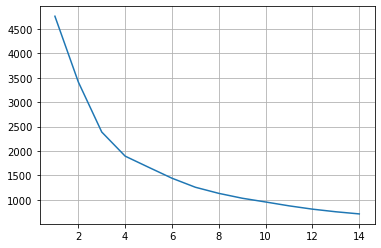

In [135]:
plt.plot(range(1, 15), wss)
plt.grid()
plt.show()

In [136]:
k_means_3 = KMeans(n_clusters=3, random_state=0)
k_means_3.fit(sdf)
labels_3 = k_means_3.labels_
labels_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [137]:
silhouette_score(sdf, labels)

0.342615963664137

In [138]:
silhouette_score(sdf, labels_3)

0.32131573578829453

In [139]:
silhouette_samples(sdf, labels).min()

-0.025448931297441125

In [140]:
silhouette_samples(sdf, labels_3).min()

-0.023024981590489678

In [146]:
print(labels)
df['clus_kmeans2'] = labels
df

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1]


,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H-Cluster,Agglo_Clusters,clus_kmeans2
0,0.72694,1.4742,0.32396,0.985350,1.000000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,2,1,0
1,0.74173,1.5257,0.36116,0.981520,0.998250,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,2,1,0
2,0.76722,1.5725,0.38998,0.977550,1.000000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,2,1,0
3,0.73797,1.4597,0.35376,0.975660,1.000000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,2,1,0
4,0.82301,1.7707,0.44462,0.976980,1.000000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.761323,0.915575,0.125230,0.091860,1.016331,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,1,0,1
336,0.28064,1.0849,0.75319,0.761323,0.915575,0.136860,0.078996,1.016331,0.141220,0.218300,0.045488,0.012002,0.001137,2.40590,1,0,1
337,0.35344,1.0329,0.78147,0.761323,0.915575,0.135030,0.089763,1.016331,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,1,0,1
338,0.59988,1.1427,0.71532,0.761323,0.915575,0.157470,0.105303,1.016331,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,1,0,1


In [147]:
df['clus_kmeans2'].value_counts().sort_index()

0    259
1     81
Name: clus_kmeans2, dtype: int64

In [150]:
clust_profile=df.groupby('clus_kmeans2').mean()
clust_profile

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H-Cluster,Agglo_Clusters
clus_kmeans2,,,,,,,,,,,,,,,,
0,0.742849,1.924542,0.462009,0.955379,0.992359,0.620862,0.019937,0.108086,0.054176,0.128885,0.018551,0.005972,0.000392,1.202431,1.895753,0.915058
1,0.646327,1.830133,0.679237,0.803102,0.923135,0.244643,0.081680,0.848586,0.041724,0.110625,0.014103,0.004740,0.000239,1.035365,1.000000,0.000000


In [151]:
clust_profile['freq']=df.clus_kmeans2.value_counts().sort_index()
clust_profile.round(0)

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy,H-Cluster,Agglo_Clusters,freq
clus_kmeans2,,,,,,,,,,,,,,,,,
0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,259
1,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,81


In [142]:
# ss = []
# for k in range(2,11):
#     sil_km = KMeans(n_clusters=k, random_state=0)
#     sil_km.fit(sdf)
#     labels = sil_km.labels_
#     ss.append(silhouette_score(sdf,labels))

In [143]:
# plt.plot(range(2,11),ss,marker ='o')
# plt.xlabel('No. of clusters - K')
# plt.ylabel('Silhoutte Scores');

silhouette score is better for 5 clusters than for other cluster numbers. So, final number of clusters we will take as 5.

In [144]:
# k_means_5 = KMeans(n_clusters=5, random_state=0)
# k_means_5.fit(sdf)
# labels_5 = k_means.labels_

In [145]:
#df['clus_kmeans5'] = labels_5
# df['clus_kmeans2'] = labels
# df

In [152]:
np.random.seed(7)
arr = np.array(np.random.rand(20)).reshape(10, 2)
arr

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587],
       [0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904],
       [0.38094113, 0.06593635],
       [0.2881456 , 0.90959353],
       [0.21338535, 0.45212396],
       [0.93120602, 0.02489923]])

In [153]:
s = StandardScaler()
ns = s.fit_transform(arr)
ns

array([[-1.39522475,  0.93201877],
       [-0.1296922 ,  0.7523863 ],
       [ 1.75612561,  0.16382359],
       [ 0.08948178, -1.32037931],
       [-0.72373342,  0.04095785],
       [ 0.71196956,  1.00781355],
       [-0.33054158, -1.33983624],
       [-0.65485934,  1.34463703],
       [-0.91614429, -0.11100733],
       [ 1.59261863, -1.47041422]])

In [155]:
ns.mean().round(0)

0.0

In [156]:
ns.std().round(0)

1.0

In [161]:
k_meansx = KMeans(n_clusters=2, random_state=0)
k_meansx.fit(ns)
lab = k_meansx.labels_

In [162]:
lab

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [163]:
silhouette_score(ns,lab)

0.4069015400992441